# Welcome to the MLE-Infrastructure 🤗

In [1]:
!pip -q install mle-toolbox

# Check if code is run in Colab: If so -- download configs from repo
try:
    import google.colab
    IN_COLAB = True
    !git clone https://github.com/mle-infrastructure/mle-tutorial
    !cd mle-tutorial
    !ls
except:
    IN_COLAB = False

# Log your Experiments with `mle-logging`

In [2]:
from mle_logging import MLELogger

def train_your_net(epoch: int, seed_id: int, lrate: float, batch_size: int, arch: str):
    """Optimum: lrate=0.2, batch_size=4, arch='conv'."""
    import random
    f1 = (lrate - 0.2) ** 2 + (batch_size - 4) ** 2 + (0 if arch == "conv" else 10)
    train_loss = f1 + seed_id * 0.5
    test_loss = f1 + seed_id * 0.5 + random.uniform(0, 0.3)
    return train_loss / epoch, test_loss / epoch

In [3]:
from mle_logging.utils import load_yaml_config

train_config = {"lrate": 0.2,
                "batch_size": 4,
                "arch": "mlp"}

config_fname = "configs/base_config_1.yaml"
train_config = load_yaml_config(config_fname)

In [4]:
seed_id = 1

log = MLELogger(
    experiment_dir="experiments/log_logging",
    config_fname=config_fname,
    seed_id=seed_id,
    time_to_track=["num_epochs"],
    what_to_track=["train_loss", "test_loss"],
    verbose=True
)

╭──────────────────────────────────────────────────────────────────────────────╮
│  __    __  __      ______  __      ______  ______          08/12/21 20:10:57 │
│ /\ "-./  \/\ \    /\  ___\/\ \    /\  __ \/\  ___\          Logger v0.0.4 🔏 │
│ \ \ \-./\ \ \ \___\ \  __\  \ \___\ \ \/\ \ \ \__ \         ]8;id=939542;https://twitter.com/RobertTLange\@RobertTLange]8;;\ 🐦 │
│  \ \_\ \ \_\ \_____\ \_____\ \_____\ \_____\ \_____\         ]8;id=173167;https://github.com/RobertTLange/mle-logging/blob/main/examples/getting_started.ipynb\MLE-Log Docs]8;;\ 📓 │
│   \/_/  \/_/\/_____/\/_____/\/_____/\/_____/\/_____/         ]8;id=731957;https://github.com/RobertTLange/mle-logging/\MLE-Log Repo]8;;\ 📝 │
╰──────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────────────────────────────────╮
│ ╭────────────────────────────────────╮╭────────────────────────────────────╮ │
│ │ 📖 Log Dir:                        ││ 📄 Config:                         │ │
│ │ experiments/log_logging/base_conf… ││ configs/base_config_1.yaml         │ │
│ ╰────────────────────────────────────╯╰────────────────────────────────────╯ │
│ ╭────────────────────────────────────╮╭────────────────────────────────────╮ │
│ │ ⌚ Time: num_epochs                ││ 📉 Stats: train_loss, test_loss    │ │
│ ╰────────────────────────────────────╯╰────────────────────────────────────╯ │
│ ╭────────────────────────────────────╮╭────────────────────────────────────╮ │
│ │ 🌱 Seed ID: 1                      ││ 🚀 Model: no-model-type            │ │
│ ╰────────────────────────────────────╯╰────────────────────────────────────╯ │
╰──────────────────────────────────────────────────────────────────────────────╯

In [5]:
for epoch in range(1, 11):
    train_loss, test_loss = train_your_net(epoch, seed_id, **train_config)
    log.update(
        {"num_epochs": epoch},
        {"train_loss": train_loss, "test_loss": test_loss},
        save=True,
    )

                                                                         
         ⌚ time           num_epochs    📉 train_loss     test_loss            
        ───────────────────────────────────────────────────────────────         
         21-12-08/20:10        1              10.5          10.6953             
                                                                        

                                                                         
         21-12-08/20:10        2              5.25           5.3163             
                                                                        

                                                                         
         21-12-08/20:10        3              3.5            3.5387             
                                                                        

                                                                         
         21-12-08/20:10        4             2.625           2.6846             
                                                                        

                                                                         
         21-12-08/20:10        5              2.1            2.1361             
                                                                        

                                                                         
         21-12-08/20:10        6              1.75           1.7923             
                                                                        

                                                                         
         21-12-08/20:10        7              1.5            1.5302             
                                                                        

                                                                         
         21-12-08/20:10        8             1.3125          1.3208             
                                                                        

                                                                         
         21-12-08/20:10        9             1.1667          1.172              
                                                                        

                                                                         
         21-12-08/20:10        10             1.05           1.0619             
                                                                        

(<Figure size 648x432 with 1 Axes>,
 <AxesSubplot:title={'center':'train_loss, test_loss'}, xlabel='num_epochs', ylabel='train_loss, test_loss'>)

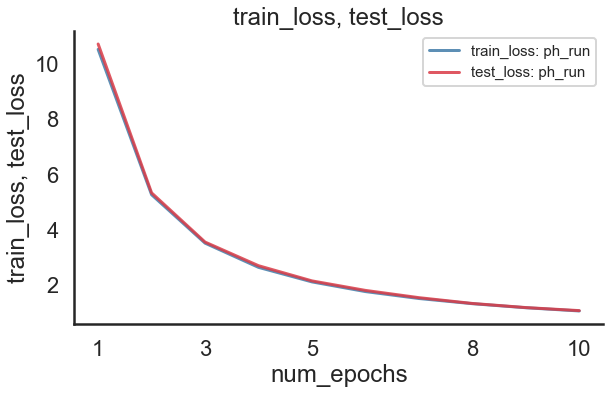

In [7]:
# Reload log & visualize the data
from mle_logging import load_log
log = load_log("experiments/log_logging/base_config_1")
log.plot(["train_loss", "test_loss"])

# Launch your Experiments with `mle-scheduler`

In [8]:
from mle_scheduler import MLEQueue

queue = MLEQueue(resource_to_run="local",
                 job_filename="train.py",
                 config_filenames=["configs/base_config_1.yaml",
                                   "configs/base_config_2.yaml"],
                 random_seeds=[0, 1],
                 experiment_dir="experiments/logs_queue")

queue.run()

Output()

MLEQueue - local • 4/4 Jobs ━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% • 0:00:01 ⌛

```python
# Each job requests 5 CPU cores & 1 V100S GPU w. CUDA 10.0 loaded
job_args = {
    "partition": "<SLURM_PARTITION>",  # Partition(s) to schedule jobs on
    "env_name": "mle-toolbox",  # Env to activate at job start-up
    "use_conda_venv": True,  # Whether to use anaconda venv
    "num_logical_cores": 5,  # Number of requested CPU cores per job
    "num_gpus": 1,  # Number of requested GPUs per job
    "gpu_type": "V100S",  # GPU model requested for each job
    "modules_to_load": "nvidia/cuda/10.0"  # Modules to load at start-up
}


queue = MLEQueue(
    resource_to_run="slurm-cluster",
    job_filename="train.py",
    job_arguments=job_args,
    config_filenames=["base_config_1.yaml",
                      "base_config_2.yaml"],
    experiment_dir="logs_queue_slurm",
    random_seeds=[0, 1]
)
queue.run()
```

# Hyperparameter Search with `mle-hyperopt`

In [9]:
from mle_hyperopt import GridSearch, RandomSearch

# Instantiate random search class
strategy = GridSearch(
    real={"lrate": {"begin": 0.1, "end": 0.5, "bins": 5}},
    integer={"batch_size": {"begin": 1, "end": 5, "bins": 5}},
    categorical={"arch": ["mlp", "cnn"]},
    verbose=True,
)

# Ask for configurations to evaluate & run parallel eval of seeds * configs
configs, config_fnames = strategy.ask(2, store=True)
configs

           MLE-Hyperopt Gird Search Hyperspace 🚀                      
                                                                                
           🌻 Variable   Type          Search Range ↔                           
          ───────────────────────────────────────────────────────────           
           arch          categorical   ['mlp', 'cnn']                           
           lrate         real          Begin: 0.1, End: 0.5, Bins: 5            
           batch_size    integer       Begin: 1, End: 5, Bins: 5     

[{'arch': 'mlp', 'batch_size': 1, 'lrate': 0.1},
 {'arch': 'mlp', 'batch_size': 1, 'lrate': 0.2}]

In [10]:
queue = MLEQueue(
    resource_to_run="local",
    job_filename="train.py",
    config_filenames=config_fnames,
    random_seeds=[1, 2],
    experiment_dir="experiments/logs_search",
    automerge_configs=True
)
queue.run()

Output()

MLEQueue - local • 4/4 Jobs ━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% • 0:00:01 ⌛

In [11]:
from mle_logging import load_meta_log
meta_log = load_meta_log("experiments/logs_search/meta_log.hdf5")
test_scores = [meta_log[r].stats.test_loss.mean[-1] for r in queue.mle_run_ids]

strategy.tell(configs, test_scores)

┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓ 
┃ 📥 Total: 2   ┃ ID ┃ Obj. 📉 ┃ Configuration 🔖 - 12/08/2021 20:11:37       ┃ 
┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩ 
│ Best Overall  │ 0  │ 1.981   │ 'arch': 'mlp', 'batch_size': 1, 'lrate': 0.1 │ 
│ Best in Batch │ 0  │ 1.981   │ 'arch': 'mlp', 'batch_size': 1, 'lrate': 0.1 │ 
└───────────────┴────┴─────────┴──────────────────────────────────────────────┘

# Protocol your Experiments with `mle-monitor`

In [12]:
from mle_monitor import MLEProtocol

In [14]:
# Load (existing) protocol database and add experiment data
protocol_db = MLEProtocol("mle_protocol.db")
meta_data = {
    "purpose": "random search",  # Purpose of experiment
    "project_name": "surrogate",  # Project name of experiment
    "exec_resource": "local",  # Resource jobs are run on
    "experiment_dir": "logs_search",  # Experiment log storage directory
    "experiment_type": "hyperparameter-search",  # Type of experiment to run
    "base_fname": "train.py",  # Main code script to execute
    "config_fname": "configs/base_config_1.yaml",  # Config file path of experiment
    "num_seeds": 2,  # Number of evaluations seeds
    "num_total_jobs": 4,  # Number of total jobs to run
    "num_jobs_per_batch": 4,  # Number of jobs in single batch
    "num_job_batches": 1,  # Number of sequential job batches
    "time_per_job": "00:00:02",  # Expected duration: days-hours-minutes
}

new_experiment_id = protocol_db.add(meta_data)

In [15]:
# Instantiate random search class
strategy = RandomSearch(
    real={"lrate": {"begin": 0.1, "end": 0.5, "prior": "log-uniform"}},
    integer={"batch_size": {"begin": 1, "end": 5, "prior": "uniform"}},
    categorical={"arch": ["mlp", "cnn"]},
    verbose=True,
)

# Ask for configurations to evaluate & run parallel eval of seeds * configs
configs, config_fnames = strategy.ask(2, store=True)

                MLE-Hyperopt Random Search Hyperspace 🚀                    
                                                                                
      🌻 Variable   Type          Search Range ↔                                
     ──────────────────────────────────────────────────────────────────────     
      arch          categorical   ['mlp', 'cnn']                                
      lrate         real          Begin: 0.1, End: 0.5, Prior: log-uniform      
      batch_size    integer       Begin: 1, End: 5, Prior: uniform         

In [16]:
queue = MLEQueue(
    resource_to_run="local",
    job_filename="train.py",
    config_filenames=config_fnames,
    random_seeds=[1, 2],
    experiment_dir="experiments/logs_protocol",
    protocol_db=protocol_db,
)
queue.run()

# Merge logs of random seeds & configs -> load & get final scores
queue.merge_configs(merge_seeds=True)
meta_log = load_meta_log("experiments/logs_protocol/meta_log.hdf5")
test_scores = [meta_log[r].stats.test_loss.mean[-1] for r in queue.mle_run_ids]

Output()

MLEQueue - local • 4/4 Jobs ━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% • 0:00:01 ⌛

In [17]:
# Update the hyperparameter search strategy
strategy.tell(configs, test_scores)

# Wrap up experiment (store completion time, etc.)
protocol_db.complete(new_experiment_id)

┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ 📥 Total: 2   ┃ ID ┃ Obj. 📉 ┃ Configuration 🔖 - 12/08/2021 20:12:08        ┃
┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Best Overall  │ 0  │ 1.192   │ 'arch': 'mlp', 'lrate': 0.360379148648584,    │
│               │    │         │ 'batch_size': 3                               │
│ Best in Batch │ 0  │ 1.192   │ 'arch': 'mlp', 'lrate': 0.360379148648584,    │
│               │    │         │ 'batch_size': 3                               │
└───────────────┴────┴─────────┴───────────────────────────────────────────────┘

# Putting it all together with `mle-toolbox`

In [18]:
!cat configs/grid_search.yaml

# Meta Arguments: What job? What train .py file? Base config? Where to store?
meta_job_args:
    project_name: "examples"
    experiment_type: "hyperparameter-search"
    base_train_fname: "train.py"
    base_train_config: "configs/base_config_1.yaml"
    experiment_dir: "experiments/search_grid"

# Parameters specific to the hyperparameter search
param_search_args:
    search_logging:
        reload_log: False
        verbose_log: True
        max_objective: False
        aggregate_seeds: "p50"
        problem_type: "final"
        eval_metrics: "test_loss"
    search_resources:
        # num_search_batches: 4
        # num_evals_per_batch: 4
        num_total_evals: 4
        max_running_jobs: 4
        num_seeds_per_eval: 1
        random_seeds: [2]
    search_config:
        search_type: "grid"
        # search_schedule: "sync"
        search_schedule: "async"
        search_params:
            real:
                lrate:
                    begin: 0.1
                    end: 0.5

In [19]:
!mle run configs/grid_search.yaml --purpose Grid Search

╭─────────────────────────────────────────────────────────────────────────────────────╮
│     __  _____    ______   ______            ____                08/12/2021 20:12:19 │
│    /  |/  / /   / ____/  /_  __/___  ____  / / /_  ____  _  __  ]8;id=116739;https://tinyurl.com/srpy4nrp\You are awesome!]8;;\ 🤗 │
│   / /|_/ / /   / __/______/ / / __ \/ __ \/ / __ \/ __ \| |/_/     ]8;id=777572;https://twitter.com/RobertTLange\@RobertTLange]8;;\ 🐦 │
│  / /  / / /___/ /__/_____/ / / /_/ / /_/ / / /_/ / /_/ />  <    ]8;id=256787;https://roberttlange.github.io/mle-toolbox/\MLE-Toolbox Docs]8;;\ 📓 │
│ /_/  /_/_____/_____/    /_/  \____/\____/_/_.___/\____/_/|_|    ]8;id=146316;https://github.com/RobertTLange/mle-toolbox/\MLE-Toolbox Repo]8;;\ 📝 │
╰─────────────────────────────────────────────────────────────────────────────────────╯
12/08/2021 08:12:19 PM Loaded configuration: configs/grid_search.yaml
12/08/2021 08:12:19 PM Run on resource: local
12/08/2021 08:12:20 PM Pulled fro

In [ ]:
from mle_toolbox import load_result_logs

meta_log, hyper_log = load_result_logs("experiments)